# Прогнозирование диабета

Набор данных прогнозирования диабета представляет собой перечень медицинских и демографических данных пациентов, а также статус наличия диабета. Данные включают в себя такие характеристики, как: возраст, пол, индекс массы тела (ИМТ), гипертония, сердечно-сосудистые заболевания, история курения в анамнезе, уровень гемоглобина и глюкозы в крови. Данный набор данных можно использовать для создания моделей машинного обучения по прогнозированию диабета у пациентов на основе их истории болезни и демографической информации.

Исходный набор данных:
1. gender - пол (мужской, женский);
2. age - возраст (от 0 до 80 лет);
3. hypertension - является ли человек гипертоником (0 - не является);
4. heart_disease - имеетли человек сердечно-сосудистые заболевания (0 - не имеет сердечно-сосудистые заболевания);
5. smoking_history - история курения человека в анамнезе;
6. bmi - Индекс Массы Тела (диапазон ИМТ в наборе данных составляет от 10,16 до 71,55. ИМТ менее 18,5 — недостаточный вес, 18,5–24,9 — нормальный, 25–29,9 — избыточный вес, 30 и более — ожирение);
7. HbA1c_level - уровень гимоглабина в крови (в основном более 6,5% уровня HbA1c указывает на диабет);
8. blood_glucose_level - уровень глюкозы в крови (высокий уровень глюкозы в крови является ключевым показателем диабета);
9. diabetes - Диабет является прогнозируемой целевой переменной, где значения 1 указывают на наличие диабета, а 0 — на отсутствие диабета.

Цель работы: 
    Сравнение трех моделей машинного обучения на бинарной классификации для прогнозирования диабета у пациентов на основе их истории болезни и демографической информации. 

Кому может быть полезно: Медицинским работникам при выявлении пациентов, которые могут подвергаться риску развития диабета и при разработке индивидуальных планов лечения. Кроме того, набор данных может быть использован исследователями для изучения взаимосвязей между различными медицинскими и демографическими факторами и вероятностью развития диабета.

Используемые модели машинного обучения: В данной работе мы хотим сравнить как на датасете прогнозирования диабета работают три модели машинного обучения:
    1. Логистическая регрессия;
    2. Дерево решений;
    3. Случайный лес. 

In [99]:
# Подгрузка необходимых библиотек для анализа данных
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

In [100]:
# Единый стандарт для всех графиков
sns.set(rc = {'figure.figsize':(9, 6)})

## Загрузка данных и выполние предобработки

In [101]:
# Загрузка датасета
data = pd.read_csv('diabetes_prediction_dataset.csv')
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [102]:
# Удаление дубликатов с датасета
data.drop_duplicates()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [103]:
# Создание описательной статистики
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [104]:
# В колонке 'gender' есть значение 'Other'(другой). От них можно избавиться, это ошибка в данных. 
data['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [105]:
data = data[data['gender'] != 'Other']

In [106]:
# Проверка данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99982 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99982 non-null  object 
 1   age                  99982 non-null  float64
 2   hypertension         99982 non-null  int64  
 3   heart_disease        99982 non-null  int64  
 4   smoking_history      99982 non-null  object 
 5   bmi                  99982 non-null  float64
 6   HbA1c_level          99982 non-null  float64
 7   blood_glucose_level  99982 non-null  int64  
 8   diabetes             99982 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.6+ MB


In [107]:
# Так как в колонке "smoking_history" много различных котегориальных данных их можно сгруппировать.
data['smoking_history'].value_counts()

No Info        35810
never          35092
former          9352
current         9286
not current     6439
ever            4003
Name: smoking_history, dtype: int64

In [108]:
def smoking(status):
    # "бывший", "всегда" и "не курящий в данное время" можно сгруппировать в "бывший курильшик"
    if status in ['former', 'ever', 'not current']:  
        return 'past_smoker'
    # "никогда" и "нет информации" можно сгруппировать в 'не курящий'
    elif status in ['No Info', 'never']:
        return 'non-smoker'
    # "курящий в данное время" можно оставить также
    elif status == 'current':
        return 'current'

In [109]:
# Теперь нужно применить функцию 'smouking' к столбцу 'smoking_history'.
data['smoking_history'] = data['smoking_history'].apply(smoking)

C:\Users\MEROKAS-2\AppData\Local\Temp\ipykernel_9580\3400397418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smoking_history'] = data['smoking_history'].apply(smoking)


### Проверка данных на выбросы (аномальные значения)

Так как выбросы в выборке, являются важным недостатком при обучении моделей машинного обучения, их необходимо устранить. 

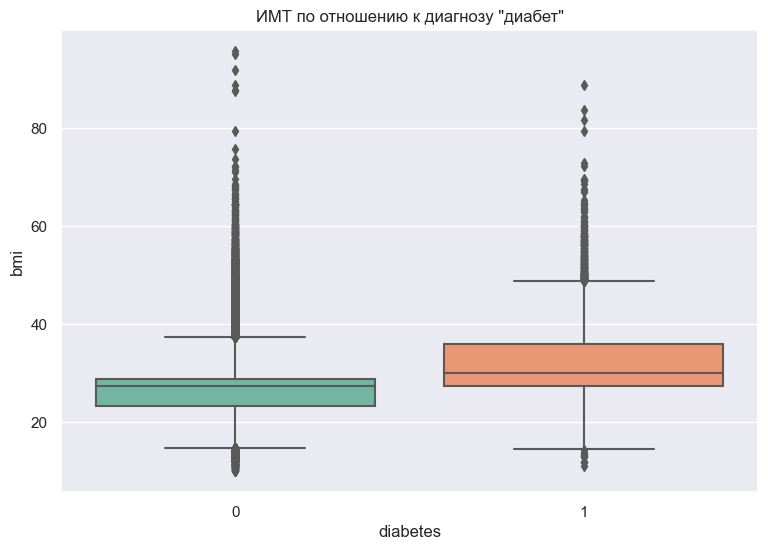

In [110]:
# Проверка ИМТ на выбросы
sns.boxplot(x='diabetes', y='bmi', data=data, palette = "Set2")
plt.title('ИМТ по отношению к диагнозу "диабет"')
plt.show()

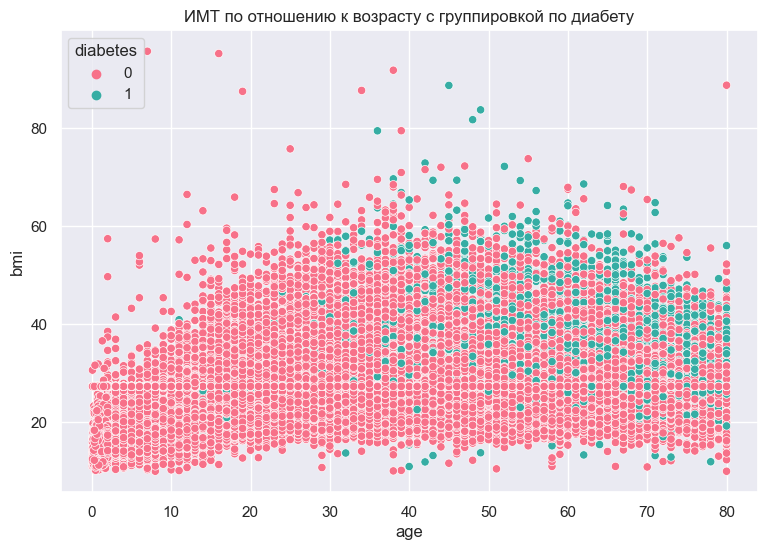

In [111]:
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=data, palette='husl')
plt.title('ИМТ по отношению к возрасту с группировкой по диабету')
plt.show()

На графиках показано что, имеются данные у которых индекс массы тела аномально большой (более 75%). По формуле ИМТ = m/h^2, где m - вес, h - рост человека, можно определить, что такой показатель "ИМТ" присутствует у очень малого количества людей в выборке, соответственно от таких данных можно избавиться.

In [112]:
data = data[data['bmi'] <= 75]

In [113]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,non-smoker,25.19,6.6,140,0
1,Female,54.0,0,0,non-smoker,27.32,6.6,80,0
2,Male,28.0,0,0,non-smoker,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


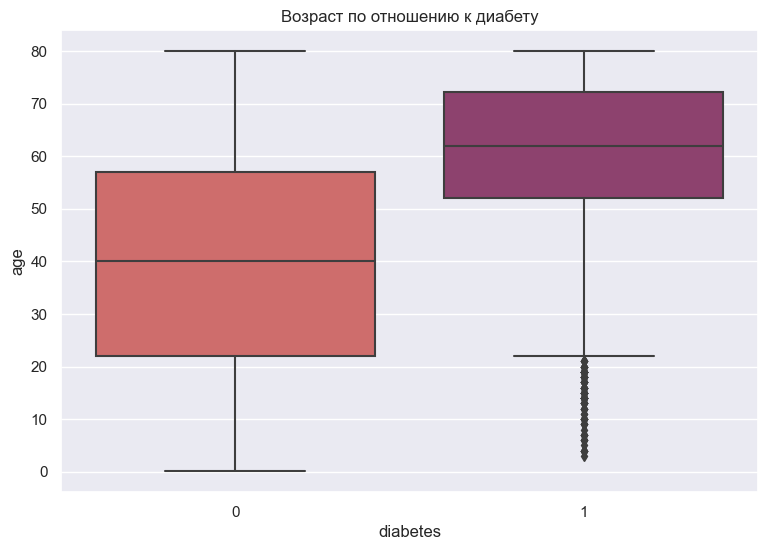

In [114]:
# Проверка возраста на выбросы
sns.boxplot(x='diabetes', y='age', data=data, palette='flare')
plt.title('Возраст по отношению к диабету')
plt.show()

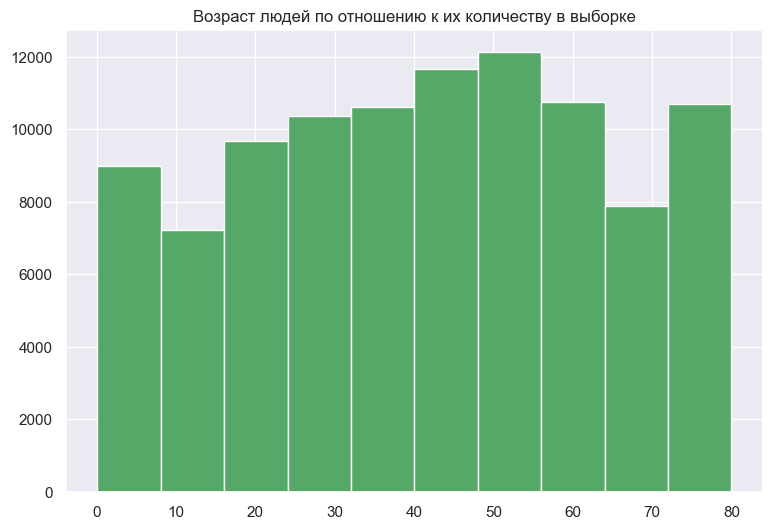

In [115]:
plt.hist('age', data=data, color='g')
plt.title('Возраст людей по отношению к их количеству в выборке')
plt.show()

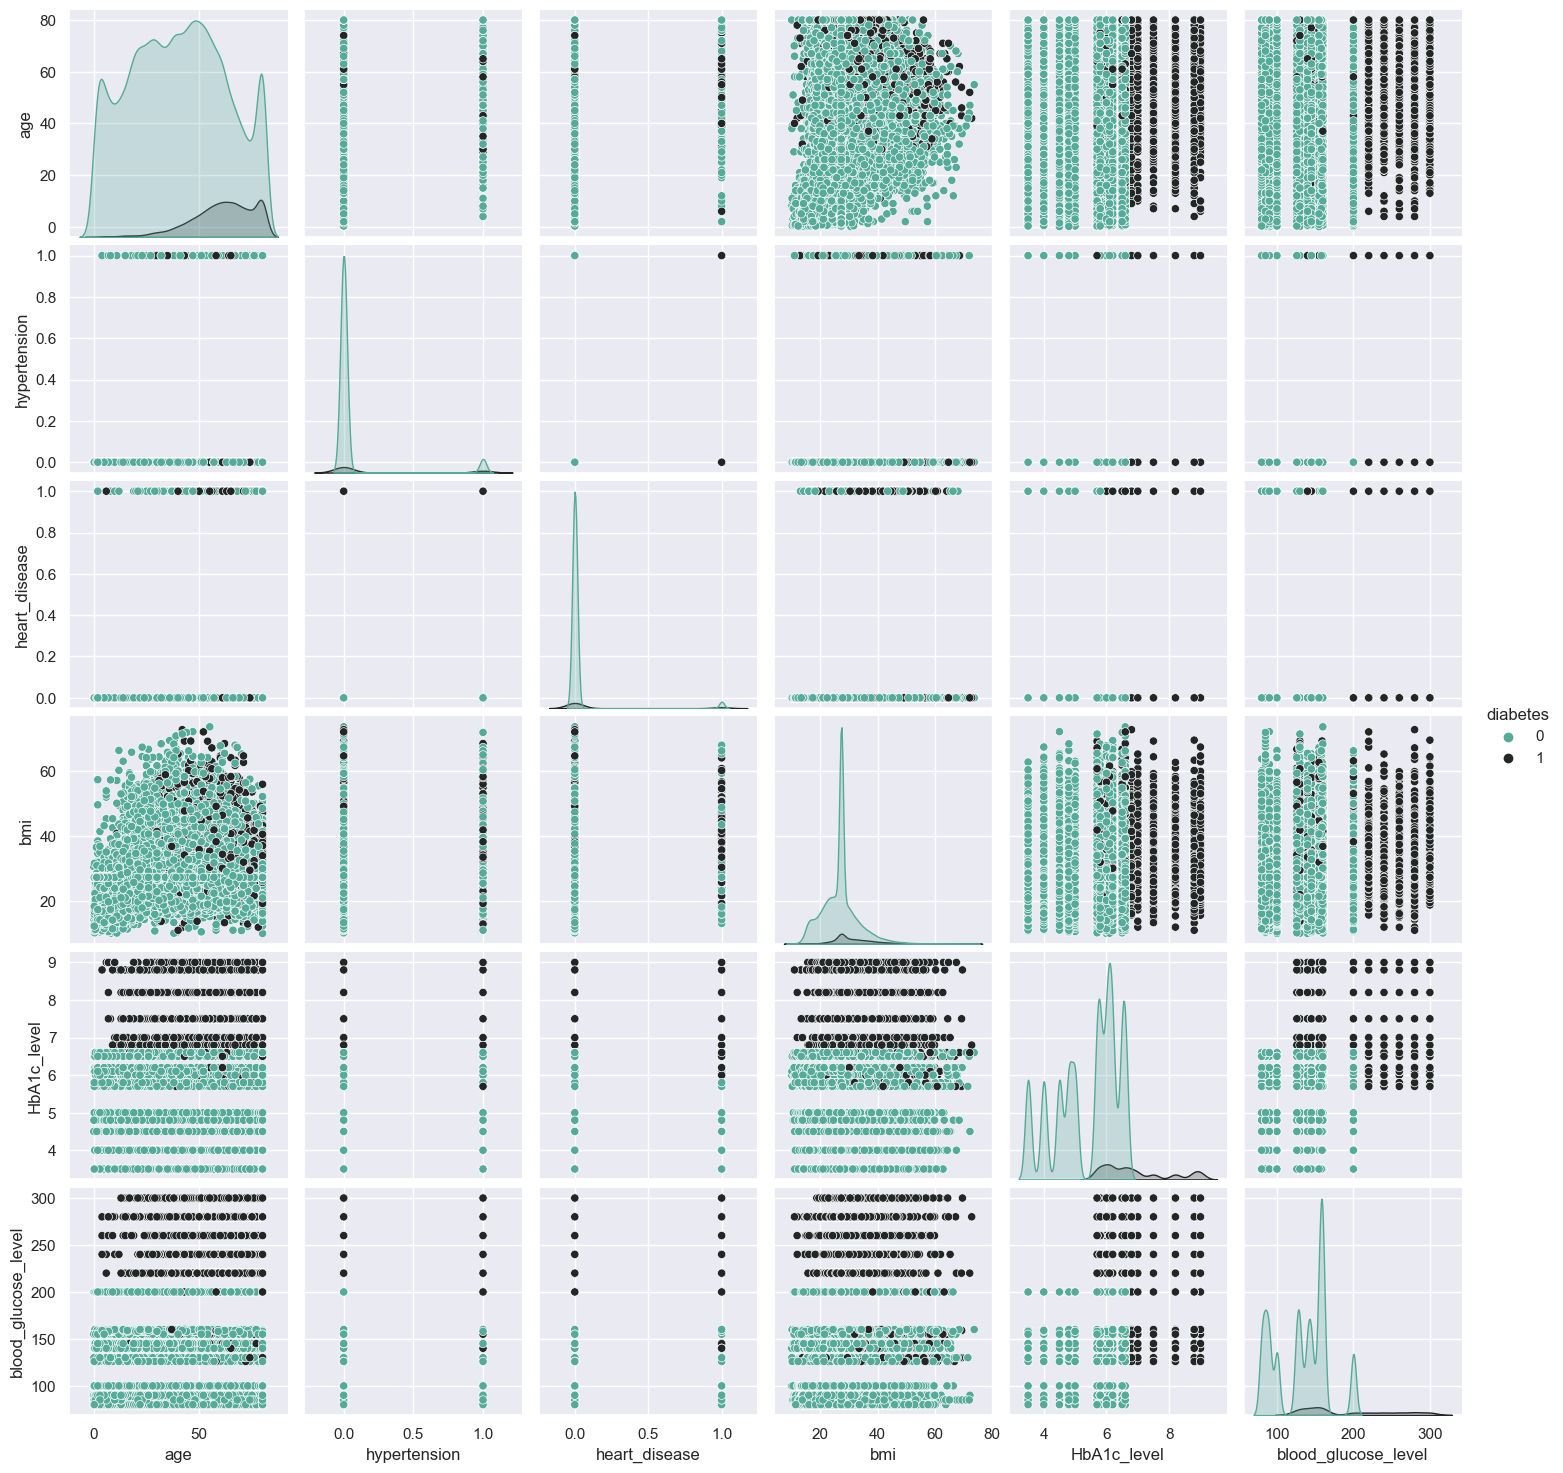

In [116]:
# Отображение всех зависимостей между данными на разных графиках. 
sns.pairplot(data, hue='diabetes', palette='dark:#5A9_r')
plt.show()

На графиках показано, что у данных отсутствуют выбросы, следовательно их можно не трогать.

In [118]:
# Выделение целевой переменной* и сохраняние её в переменную "y".
X = data.drop(columns=['diabetes'])
y = data['diabetes']
# *целевая переменная - это признак датасета который предстоит предсказывать модели машинного обучения.

## One-hot-encoding и StandartScaler

In [119]:
# Перевод "гипертония" и "сердечно-сосудистые заболевания" в категориальный тип данных, так как они отражают болен человек или здоров, а не числовой признак.
X['hypertension'] = X['hypertension'].astype('object')
X['heart_disease'] = X['heart_disease'].astype('object')

In [120]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99970 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99970 non-null  object 
 1   age                  99970 non-null  float64
 2   hypertension         99970 non-null  object 
 3   heart_disease        99970 non-null  object 
 4   smoking_history      99970 non-null  object 
 5   bmi                  99970 non-null  float64
 6   HbA1c_level          99970 non-null  float64
 7   blood_glucose_level  99970 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 6.9+ MB


In [122]:
# Котегориальные данные нужно закодировать, так как модель машинного обучения не может работать с буквенными данными.
# Существуют несколько способов кодировки, был выбран способ встроенный в библиотеку Pandas.
X = pd.get_dummies(X)
X

,age,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,smoking_history_current,smoking_history_non-smoker,smoking_history_past_smoker
0,80.0,25.19,6.6,140,1,0,1,0,0,1,0,1,0
1,54.0,27.32,6.6,80,1,0,1,0,1,0,0,1,0
2,28.0,27.32,5.7,158,0,1,1,0,1,0,0,1,0
3,36.0,23.45,5.0,155,1,0,1,0,1,0,1,0,0
4,76.0,20.14,4.8,155,0,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,27.32,6.2,90,1,0,1,0,1,0,0,1,0
99996,2.0,17.37,6.5,100,1,0,1,0,1,0,0,1,0
99997,66.0,27.83,5.7,155,0,1,1,0,1,0,0,0,1
99998,24.0,35.42,4.0,100,1,0,1,0,1,0,0,1,0


In [123]:
# Деление данных на котегориальные и числовые
cat_data = X[['hypertension_0', 'hypertension_1', 'heart_disease_0', 'heart_disease_1', 'gender_Female', 'gender_Male', 'smoking_history_current', 'smoking_history_non-smoker', 'smoking_history_past_smoker']]
num_data = X[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]

In [124]:
scaler = StandardScaler()

In [125]:
num_data = scaler.fit_transform(num_data.to_numpy())
num_data = pd.DataFrame(num_data, columns=["age","bmi",'HbA1c_level','blood_glucose_level'])
num_data

,age,bmi,HbA1c_level,blood_glucose_level
0,1.692519,-0.321509,1.001718,0.047745
1,0.537860,0.000957,1.001718,-1.426214
2,-0.616798,0.000957,0.161119,0.489933
3,-0.261519,-0.584932,-0.492680,0.416235
4,1.514879,-1.086041,-0.679479,0.416235
...,...,...,...,...
99965,1.692519,0.000957,0.628118,-1.180555
99966,-1.771457,-1.505398,0.908318,-0.934895
99967,1.070780,0.078167,0.161119,0.416235
99968,-0.794438,1.227237,-1.426678,-0.934895


In [126]:
print(cat_data.shape)
print(num_data.shape)

(99970, 9)
(99970, 4)


In [127]:
One_hot_data = pd.concat([num_data.reset_index(drop=True),cat_data.reset_index(drop=True)],axis=1)
One_hot_data

,age,bmi,HbA1c_level,blood_glucose_level,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,gender_Female,gender_Male,smoking_history_current,smoking_history_non-smoker,smoking_history_past_smoker
0,1.692519,-0.321509,1.001718,0.047745,1,0,0,1,1,0,0,1,0
1,0.537860,0.000957,1.001718,-1.426214,1,0,1,0,1,0,0,1,0
2,-0.616798,0.000957,0.161119,0.489933,1,0,1,0,0,1,0,1,0
3,-0.261519,-0.584932,-0.492680,0.416235,1,0,1,0,1,0,1,0,0
4,1.514879,-1.086041,-0.679479,0.416235,0,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99965,1.692519,0.000957,0.628118,-1.180555,1,0,1,0,1,0,0,1,0
99966,-1.771457,-1.505398,0.908318,-0.934895,1,0,1,0,1,0,0,1,0
99967,1.070780,0.078167,0.161119,0.416235,1,0,1,0,0,1,0,0,1
99968,-0.794438,1.227237,-1.426678,-0.934895,1,0,1,0,1,0,0,1,0


In [128]:
One_hot_data.isna().sum()

age                            0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
hypertension_0                 0
hypertension_1                 0
heart_disease_0                0
heart_disease_1                0
gender_Female                  0
gender_Male                    0
smoking_history_current        0
smoking_history_non-smoker     0
smoking_history_past_smoker    0
dtype: int64

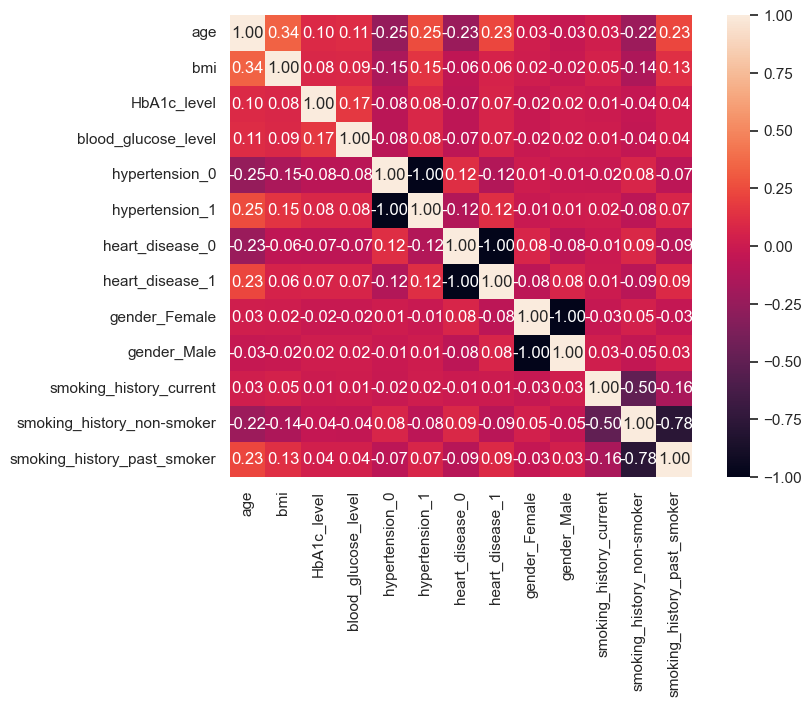

In [129]:
# Визуализация корреляции числовых данных
sns.heatmap(One_hot_data.corr(),fmt='.2f', square = True, annot=True)
plt.show()

На графике показано, что данные не имеют явно выраженной положительной линейной зависимости.

## Train-test split

In [130]:
# Разделение данных на обучающую выборку и выборку по которой будет предсказываться целевая переменная
X_train, X_test, y_train, y_test = train_test_split(One_hot_data, y, train_size=0.75)

## Обучение

### LogisticRegression

In [131]:
from sklearn.model_selection import GridSearchCV

In [60]:
# Создание модели logisticRegression, указав солвер
clf = LogisticRegression(solver='liblinear')

# Описание параметров
param_grid = {
    'C': np.array([1, 2, 3, 4]),
    'penalty': ['l1', 'l2'],
    'random_state': range(0, 5)
}

# Создание объекта GridSearchCV
search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True)

# Запуск поика наилучших прараметров
search.fit(X_train, y_train)

# Наилучшие параментры на кросс-валидации
search.best_params_

{'C': 2, 'penalty': 'l1', 'random_state': 1}

In [61]:
best_clf = search.best_estimator_

In [62]:
# Предсказание целевой переменной
y_pred = best_clf.predict(X_test)

In [63]:
coef, intercept = best_clf.coef_, best_clf.intercept_
coef, intercept

(array([[ 1.04098642,  0.6024228 ,  2.47772287,  1.34750504, -0.86318113,
         -0.05280972, -0.74523024,  0.        , -0.87498861, -0.61532895,
         -0.40131266, -0.7708251 , -0.52080899]]),
 array([-2.27948818]))

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [65]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'accuracy: {accuracy:.3f}') 
print(f'precision: {precision:.3f}') 
print(f'recall: {recall:.3f}')
print(f'f1: {f1:.3f}')

accuracy: 0.960
precision: 0.868
recall: 0.630
f1: 0.730


In [66]:
y_pred_proba_clf = best_clf.predict_proba(X_test)
y_pred_proba_clf

array([[9.99831254e-01, 1.68745748e-04],
       [9.99990756e-01, 9.24420664e-06],
       [9.98794180e-01, 1.20582031e-03],
       ...,
       [9.31703595e-01, 6.82964049e-02],
       [9.91044076e-01, 8.95592420e-03],
       [9.99266489e-01, 7.33510798e-04]])

<Axes: >

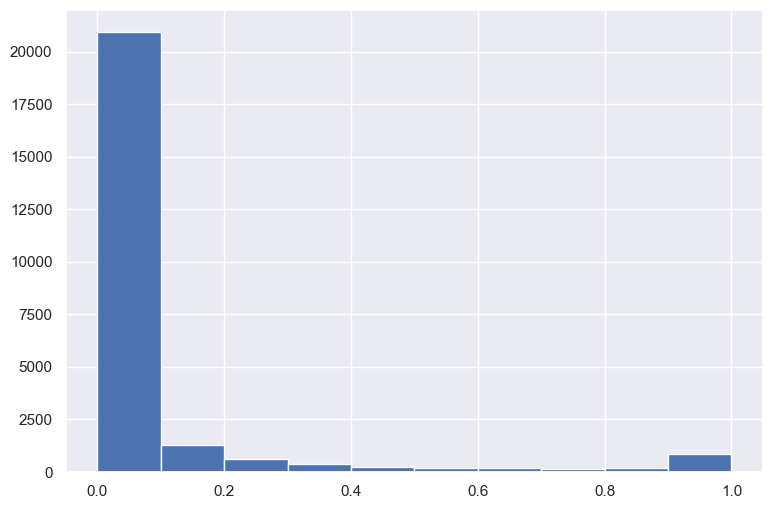

In [67]:
pd.Series(y_pred_proba_clf[:, 1]).hist()

In [68]:
y_pred_clf_clarif = np.where(y_pred_proba_clf[:, 1] > 0.2, 1, 0)

In [69]:
precision = precision_score(y_test, y_pred_clf_clarif)
recall = recall_score(y_test, y_pred_clf_clarif)
f1 = f1_score(y_test, y_pred_clf_clarif)
print(f'precision: {precision:.3f}') 
print(f'recall: {recall:.3f}')
print(f'f1: {f1:.3f}')

precision: 0.597
recall: 0.776
f1: 0.675


In [70]:
print(classification_report(y_test, y_pred_clf_clarif))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     22874
           1       0.60      0.78      0.67      2119

    accuracy                           0.94     24993
   macro avg       0.79      0.86      0.82     24993
weighted avg       0.95      0.94      0.94     24993



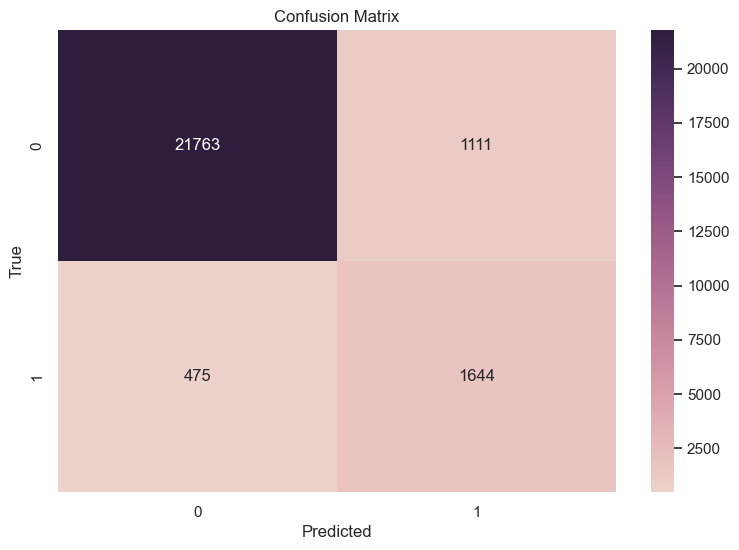

In [71]:
cm = confusion_matrix(y_test, y_pred_clf_clarif)
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### DecisionTreeClassifier

In [72]:
# # Создание модели DecisionTreeClassifier, без гиперпараметров
dtc = DecisionTreeClassifier()

# Описание параметров
params_dtc = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 11), 'min_samples_leaf': range(1, 4), 'min_samples_split': range(1, 4)}

# Создаине объекта GridSearchCV
gs_cv_dtc = GridSearchCV(dtc, params_dtc, cv = 5, n_jobs=-1)

# Запуск поиска наилучших прараметров
gs_cv_dtc.fit(X_train, y_train)

# Наилучшие параментры на кросс-валидации
gs_cv_dtc.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 1}

In [73]:
best_dtc = gs_cv_dtc.best_estimator_

In [74]:
y_pred_dtc = best_dtc.predict(X_test)

In [75]:
accuracy = accuracy_score(y_test, y_pred_dtc)
precision = precision_score(y_test, y_pred_dtc)
recall = recall_score(y_test, y_pred_dtc)
f1 = f1_score(y_test, y_pred_dtc)
print(f'accuracy: {accuracy:.3f}') 
print(f'precision: {precision:.3f}') 
print(f'recall: {recall:.3f}')
print(f'f1: {f1:.3f}')

accuracy: 0.972
precision: 0.982
recall: 0.687
f1: 0.809


In [76]:
# Вероятности отнесения к одному из классов (правая колонка в массиве показывает предсказанную вероятность того, что человек болеет диабетом)
y_pred_proba_dtc = best_dtc.predict_proba(X_test)
y_pred_proba_dtc

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.94245524, 0.05754476],
       [0.98748261, 0.01251739],
       [1.        , 0.        ]])

<Axes: >

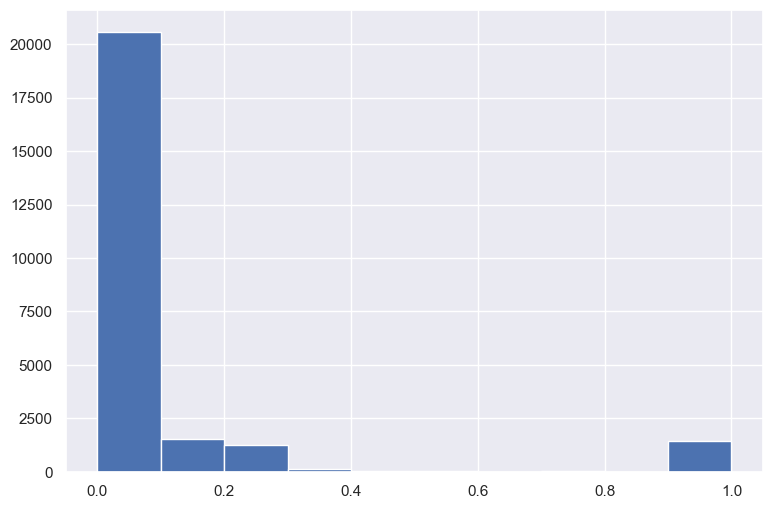

In [77]:
# Обозначение порога (отбор только правой колонки), и построение на её основе гистограмы
pd.Series(y_pred_proba_dtc[:, 1]).hist()

In [78]:
y_pred_dtc_clarif = np.where(y_pred_proba_dtc[:, 1] > 0.2, 1, 0)

In [79]:
precision = precision_score(y_test, y_pred_dtc_clarif)
recall = recall_score(y_test, y_pred_dtc_clarif)
f1 = f1_score(y_test, y_pred_dtc_clarif)
print(f'precision: {precision:.3f}') 
print(f'recall: {recall:.3f}')
print(f'f1: {f1:.3f}')

precision: 0.611
recall: 0.832
f1: 0.705


In [80]:
print(classification_report(y_test, y_pred_dtc_clarif))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     22874
           1       0.61      0.83      0.70      2119

    accuracy                           0.94     24993
   macro avg       0.80      0.89      0.84     24993
weighted avg       0.95      0.94      0.94     24993



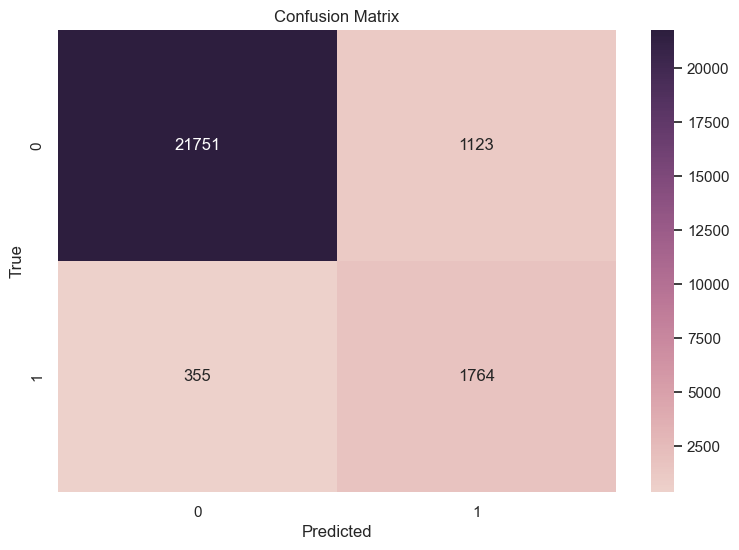

In [81]:
cm = confusion_matrix(y_test, y_pred_dtc_clarif)
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### RandomForestClassifier

In [82]:
# Создание модели RandomForestClassifier, без гиперпараметров
rfc = RandomForestClassifier()

# Описание параметров
params_rfc = {'n_estimators': range(20, 201, 20), 'max_depth': range(1, 22, 3), 'min_samples_leaf': range(1, 4), 'min_samples_split': range(1, 4)}

# Создание объекта GridSearchCV
gs_cv_rfc = GridSearchCV(rfc, params_rfc, cv = 5, n_jobs=-1)

# Запуск поиска наилучших прараметров
gs_cv_rfc.fit(X_train, y_train)

# Наилучшие параментры на кросс-валидации
gs_cv_rfc.best_params_

{'max_depth': 16,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 40}

In [83]:
best_rfc = gs_cv_rfc.best_estimator_

In [84]:
y_pred_rfc = best_rfc.predict(X_test)

In [85]:
accuracy = accuracy_score(y_test, y_pred_rfc)
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)
f1 = f1_score(y_test, y_pred_rfc)
print(f'accuracy: {accuracy:.3f}') 
print(f'precision: {precision:.3f}') 
print(f'recall: {recall:.3f}')
print(f'f1: {f1:.3f}')

accuracy: 0.972
precision: 0.982
recall: 0.684
f1: 0.806


In [86]:
# Вероятности отнесения к одному из классов (правая колонка в массиве показывает предсказанную вероятность того, что человек болеет диабетом)
y_pred_proba_rfc = best_rfc.predict_proba(X_test)
y_pred_proba_rfc

array([[9.99953832e-01, 4.61680517e-05],
       [1.00000000e+00, 0.00000000e+00],
       [9.90315315e-01, 9.68468468e-03],
       ...,
       [9.80110705e-01, 1.98892954e-02],
       [9.93403446e-01, 6.59655384e-03],
       [9.88735264e-01, 1.12647358e-02]])

<Axes: >

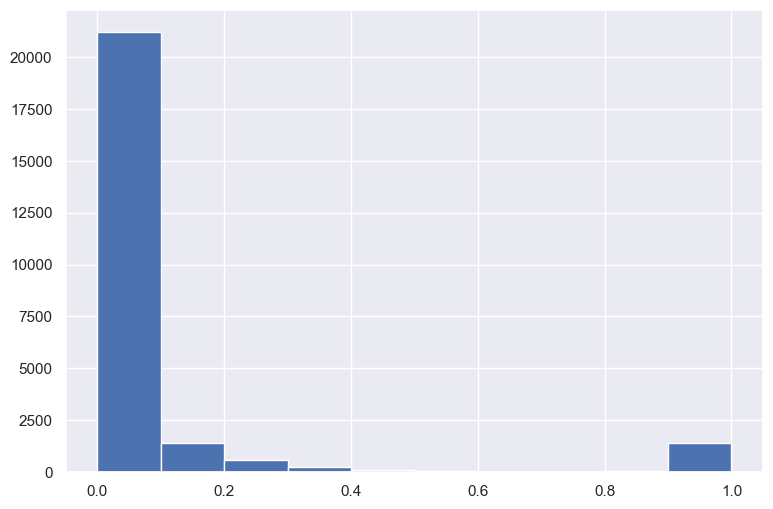

In [87]:
# Обозначение порога (отбор только правой колонки), и построение на её основе гистограмы
pd.Series(y_pred_proba_rfc[:, 1]).hist()

In [88]:
y_pred_rfc_clarif = np.where(y_pred_proba_rfc[:, 1] > 0.2, 1, 0)

In [89]:
precision = precision_score(y_test, y_pred_rfc_clarif)
recall = recall_score(y_test, y_pred_rfc_clarif)
f1 = f1_score(y_test, y_pred_rfc_clarif)
print(f'precision: {precision:.3f}') 
print(f'recall: {recall:.3f}')
print(f'f1: {f1:.3f}')

precision: 0.712
recall: 0.798
f1: 0.752


In [90]:
print(classification_report(y_test, y_pred_rfc_clarif))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     22874
           1       0.71      0.80      0.75      2119

    accuracy                           0.96     24993
   macro avg       0.85      0.88      0.86     24993
weighted avg       0.96      0.96      0.96     24993



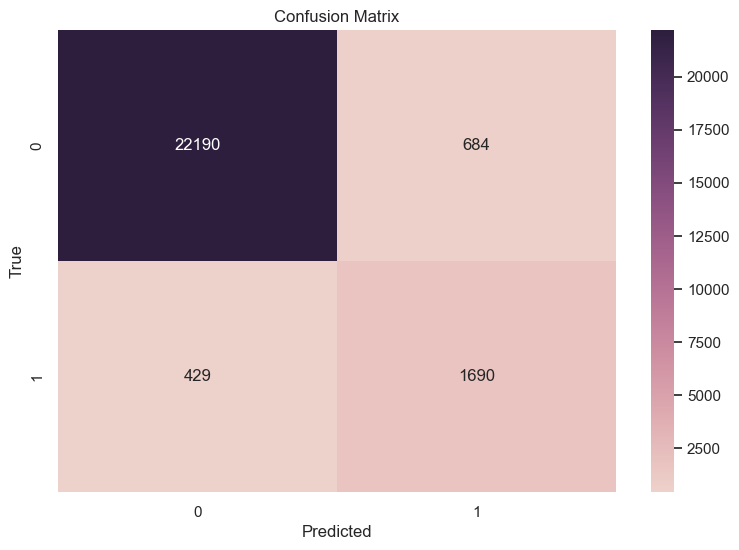

In [91]:
cm = confusion_matrix(y_test, y_pred_rfc_clarif)
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### ROC-AUC

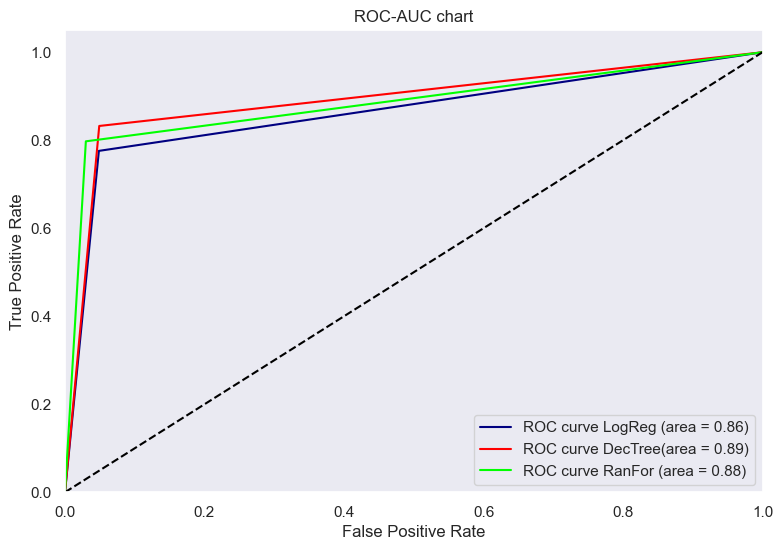

In [97]:
fpr_clf, tpr_clf, thresholds_clf = roc_curve(y_test, y_pred_clf_clarif)
roc_auc_clf = auc(fpr_clf, tpr_clf)
plt.plot(fpr_clf, tpr_clf, color='navy', label='ROC curve LogReg (area = %0.2f)' % roc_auc_clf)

fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, y_pred_dtc_clarif)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)
plt.plot(fpr_dtc, tpr_dtc, color='red', label='ROC curve DecTree(area = %0.2f)' % roc_auc_dtc)

fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_pred_rfc_clarif)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)
plt.plot(fpr_rfc, tpr_rfc, color='lime', label='ROC curve RanFor (area = %0.2f)' % roc_auc_rfc)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC chart')
plt.legend(loc="lower right")
plt.grid()

На диаграмме ROC-AUC показано: Истинные положительные результаты (TP) — это случаи, в которых мы предсказывали «да» (присутствие диабета), и в действительности тоже было «да». Ложные срабатывания (FP) — это случаи, когда мы предсказывали «да», но на самом деле это было «нет» (отсутствие диабета). 

## Выводы

По диаграмме ROC-AUC можно сделать вывод что модели DecisionTreeClassifier и RandomForestClassifier не сильно отличаются друг от друга, но всё же модель "Решающего дерева" работает чуть-чуть лучше 0.89 против 0.88, а так же работает намного быстрее 180 секунд  против 2400 секунд у модели "Случайного леса". В данном случае основной метрикой оценивается «полнота» (recall), так как мы имеем дело с диагнозом диабета. Следовательно основной задачей является минимизация "ложноотрицательных прогнозов"*, выдаваемых моделями. Сделан вывод о том, что модель "Решающее дерево" дала наилучшие результаты. Её показатель полноты составил 83.2% против 79.8% у метода "Случайный лес" и 77.6% у метода "Логистическая регресия".

*Ложноотрицательные прогнозы (FN) — это случаи, предсказания отсутствия диабета, но на самом деле человек был болен диабетом.